<a href="https://colab.research.google.com/github/priyanka0178885547/ML-LAB/blob/main/Assignment_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error, log_loss, accuracy_score

(a) Load the data into memory. Make an appropriate X matrix and y vector

In [ ]:
df = pd.read_csv("/content/WineQT.csv")
df.shape
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [ ]:
[col for col in df.columns if df[col].isnull().sum() > 0]

[]

b) Split the data at random into one set (Xtrain, ytrain) containing 80% of the instances, which will
be used for training + validation, and a testing set Xtest, ytest) (containing remaining instances).

In [ ]:
df['y'] = (df['quality'] >= 6).astype(int)
X = df.drop(['quality','y'], axis=1)
y = df['y']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

(c) Give the objective of logistic regression with L2 regularization.

1.To avoid overfitting, an extra penalty is added to the loss function.

2.This penalty depends on the sum of the squares of the model’s weights (coefficients).

The loss function becomes:average log loss + penalty for large weights

3.Logistic regression with L2 regularization builds a model that is accurate, robust, and less likely to overfit.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

(d) Run logistic regression on the data using L2 regularization, varying the regularization parameter
λ ∈ {0, 0.1, 1, 10, 100, 1000}. Plot on one graph the average cross-entropy for the training data
and the testing data (averaged over all instances), as a function of λ (you should use a log scale
for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on the third
graph the actual values of the weights obtained (one curve per weight). Finally, plot on a
graph the accuracy on the training and test set. Explain briefly what you see.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

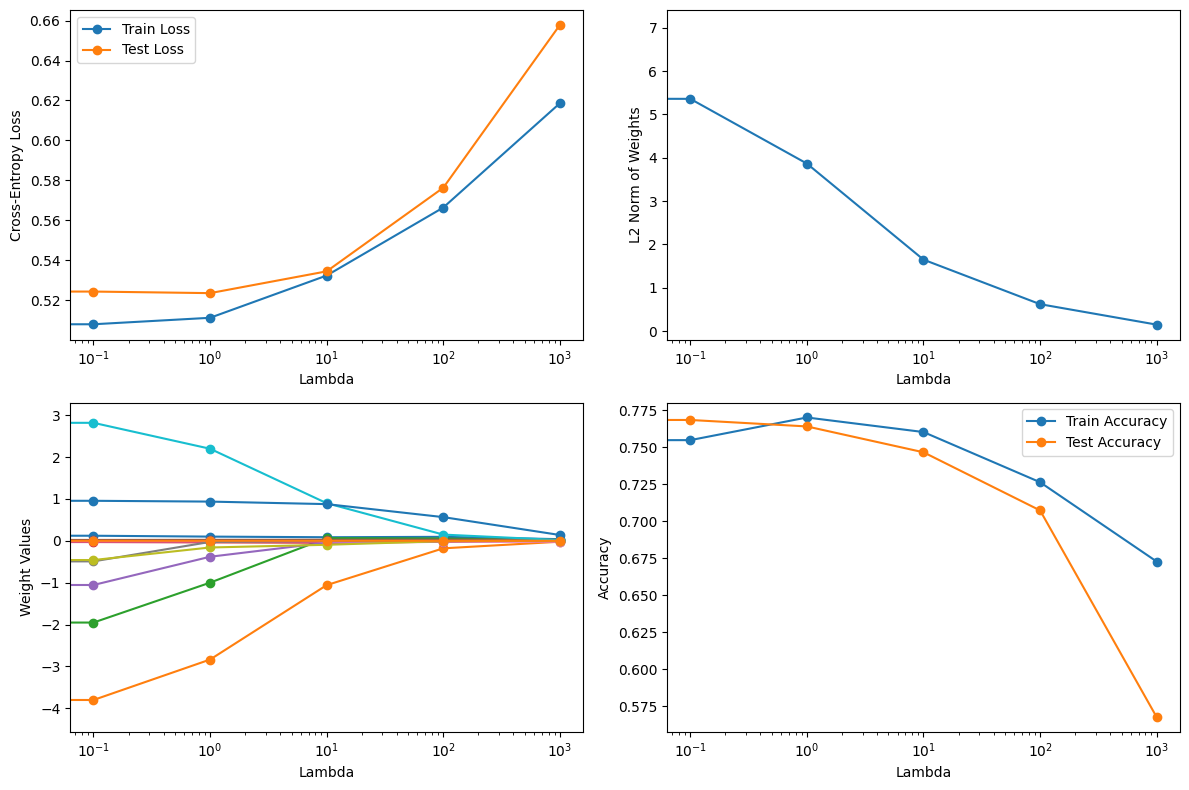

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

lambdas = [0, 0.1, 1, 10, 100, 1000]
train_losses, test_losses = [], []
train_accs, test_accs = [], []
weight_norms, all_weights = [], []

for lam in lambdas:
    if lam == 0:
        model = LogisticRegression(penalty=None, max_iter=5000)
    else:
        model = LogisticRegression(penalty="l2", C=1/lam, solver="lbfgs", max_iter=5000)
    model.fit(x_train, y_train)

    y_train_prob = model.predict_proba(x_train)
    y_test_prob = model.predict_proba(x_test)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_losses.append(log_loss(y_train, y_train_prob))
    test_losses.append(log_loss(y_test, y_test_prob))
    train_accs.append(accuracy_score(y_train, y_train_pred))
    test_accs.append(accuracy_score(y_test, y_test_pred))

    weight_vector = model.coef_.flatten()
    weight_norms.append(np.linalg.norm(weight_vector))
    all_weights.append(weight_vector)

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(lambdas, train_losses, label="Train Loss", marker='o')
plt.plot(lambdas, test_losses, label="Test Loss", marker='o')
plt.xscale("log"); plt.xlabel("Lambda"); plt.ylabel("Cross-Entropy Loss"); plt.legend()

plt.subplot(2,2,2)
plt.plot(lambdas, weight_norms, marker='o')
plt.xscale("log"); plt.xlabel("Lambda"); plt.ylabel("L2 Norm of Weights")

plt.subplot(2,2,3)
for w in np.array(all_weights).T:
    plt.plot(lambdas, w, marker='o')
plt.xscale("log"); plt.xlabel("Lambda"); plt.ylabel("Weight Values")

plt.subplot(2,2,4)
plt.plot(lambdas, train_accs, label="Train Accuracy", marker='o')
plt.plot(lambdas, test_accs, label="Test Accuracy", marker='o')
plt.xscale("log"); plt.xlabel("Lambda"); plt.ylabel("Accuracy"); plt.legend()
plt.tight_layout(); plt.show()

1.Cross-Entropy Loss: At small λ, train and test loss are low. As λ grows, both losses increase → underfitting.

2.Weight Norm: As λ increases, weights shrink steadily towards zero and almost vanish at large λ.

3.Individual Weights: At small λ, some weights are big. With larger λ, all weights move closer to zero.

4.Accuracy: Accuracy is best at λ = 1–10 (~77%). Small λ slightly overfits, large λ underfits.

(e)Re-format the data in the following way: take each of the input variables, and feed it through
a set of Gaussian basis functions, defined as follows. For each variable (except the bias term),
use 5 univariate basis functions with means evenly spaced between -10 and 10 and variance σ.
You will experiment with σ values of 0.1, 0.5, 1, 5 and 10.

In [ ]:
import numpy as np
num_features = X.shape[1]
centers = np.linspace(-10, 10, 5)
sigma_values = [0.1, 0.5, 1, 5, 10]

def gaussian_basis_transform(X, sigma):
    # Ensure X is a NumPy array
    if isinstance(X, pd.DataFrame):
        X = X.values

    m = X.shape[0]
    transformed = []
    for j in range(num_features):
        xj = X[:, j].reshape(-1, 1)
        for mu in centers:
            phi = np.exp(- (xj - mu) ** 2 / (2 * sigma ** 2))
            transformed.append(phi)
    return np.hstack(transformed)


# Example for sigma = 1
for sigma in sigma_values:
    X_transformed = gaussian_basis_transform(X, sigma)
    print(f"New shape for sigma={sigma}:", X_transformed.shape)


New shape for sigma=0.1: (1143, 60)
New shape for sigma=0.5: (1143, 60)
New shape for sigma=1: (1143, 60)
New shape for sigma=5: (1143, 60)
New shape for sigma=10: (1143, 60)


(f) Using no regularization and doing regression with this new set of basis functions, plot the
training and testing error as a function of σ (when using only basis functions of a given σ). Add
constant lines showing the training and testing error you had obtained in part c. Explain how σ
influences overfitting and the bias-variance trade-off.

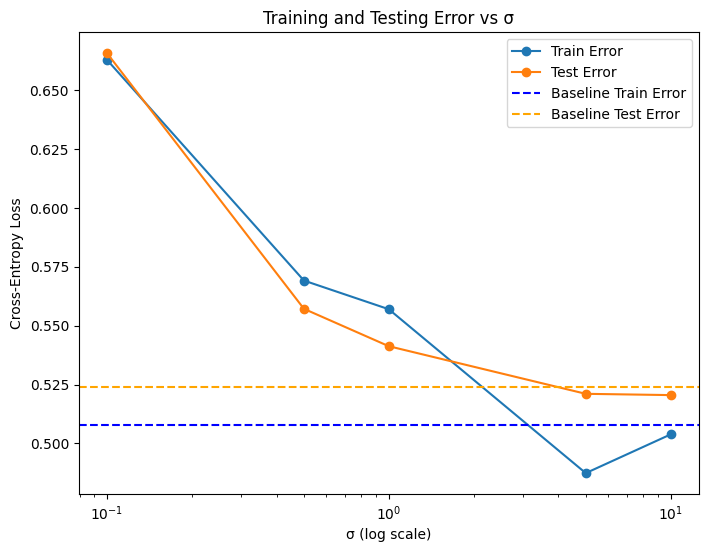

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
train_errors = []
test_errors = []

for sigma in sigma_values:

    X_train_trans = gaussian_basis_transform(x_train, sigma)
    X_test_trans = gaussian_basis_transform(x_test, sigma)
    model = LogisticRegression(C=1e10, penalty='l2', solver='lbfgs', max_iter=1000)
    model.fit(X_train_trans, y_train)
    y_train_pred_prob = model.predict_proba(X_train_trans)[:, 1]
    y_test_pred_prob = model.predict_proba(X_test_trans)[:, 1]
    train_error = log_loss(y_train, y_train_pred_prob)
    test_error = log_loss(y_test, y_test_pred_prob)
    train_errors.append(train_error)
    test_errors.append(test_error)

baseline_train_error = train_losses[0]
baseline_test_error = test_losses[0]
plt.figure(figsize=(8, 6))
plt.plot(sigma_values, train_errors, marker='o', label='Train Error')
plt.plot(sigma_values, test_errors, marker='o', label='Test Error')
plt.axhline(y=baseline_train_error, color='blue', linestyle='--', label='Baseline Train Error')
plt.axhline(y=baseline_test_error, color='orange', linestyle='--', label='Baseline Test Error')
plt.xscale('log')
plt.xlabel('σ (log scale)')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training and Testing Error vs σ')
plt.legend()
plt.show()


1.Small σ → Gausian functions are very narrow. due to the overfitting.

2.Large σ → it makes wide and the model is too simple and it comes under underfitting.

3.Medium σ → This give sgood balance. It learns well and also does well on new data.

4.Small σ → Low bias, but too much variance

5.Large σ → High bias, but low variance

(g) Add in all the basis function and perform regularized regression with the regularization
parameter λ ∈ {0, 0.1, 1, 10, 100, 1000, 10000}. Plot on one graph the average cross- entropy
error for the training data and the testing data, as a function of λ (you should use a log scale
for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on a different
graph the L2 norm of the weights for the set of basis functions corresponding to each value
of σ, as a function of λ (this will be a graph with 5 lines on it). Explain briefly the results

Total features: 300 Group features: 60


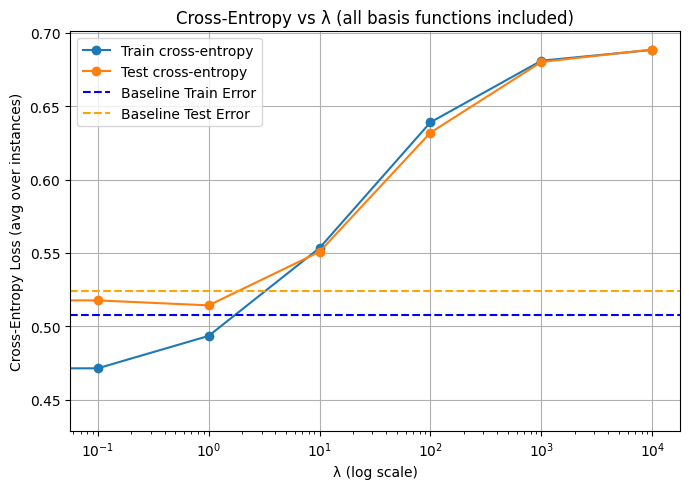

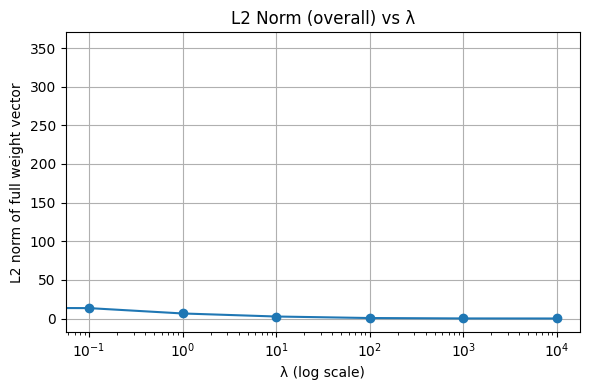

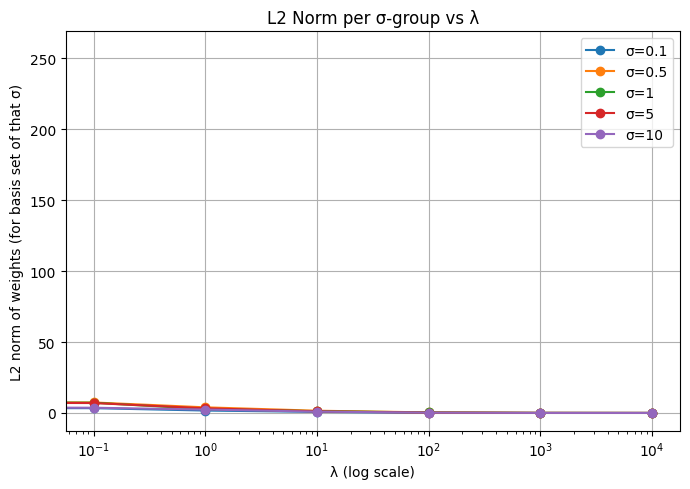

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import pandas as pd

sigma_values = [0.1, 0.5, 1, 5, 10]
lambda_values = [0, 0.1, 1, 10, 100, 1000, 10000]
C_for_lambda = lambda lam: 1e10 if lam == 0 else 1.0 / lam
def gaussian_basis_transform(X, sigma, centers=np.linspace(-10, 10, 5)):
    if isinstance(X, pd.DataFrame):
        X = X.values
    m, num_features = X.shape
    transformed = []
    for j in range(num_features):
        xj = X[:, j].reshape(-1, 1)
        for mu in centers:
            phi = np.exp(- (xj - mu) ** 2 / (2 * sigma ** 2))
            transformed.append(phi)
    return np.hstack(transformed)


X_train_groups = []
X_test_groups = []
for sigma in sigma_values:
    X_train_groups.append(gaussian_basis_transform(x_train, sigma))
    X_test_groups.append(gaussian_basis_transform(x_test, sigma))
X_train_all = np.hstack(X_train_groups)
X_test_all  = np.hstack(X_test_groups)

n_total_features = X_train_all.shape[1]
n_group_features = X_train_groups[0].shape[1]

print("Total features:", n_total_features, "Group features:", n_group_features)
try:
    baseline_train_error
    baseline_test_error
except NameError:
    baseline_train_error = None
    baseline_test_error = None

train_losses = []
test_losses  = []
l2_norms_overall = []
l2_norms_per_sigma = []

for lam in lambda_values:
    C = C_for_lambda(lam)
    model = LogisticRegression(
        penalty='l2', C=C, solver='lbfgs', max_iter=10000
    )
    model.fit(X_train_all, y_train)


    y_train_prob = model.predict_proba(X_train_all)[:, 1]
    y_test_prob  = model.predict_proba(X_test_all)[:, 1]

    train_losses.append(log_loss(y_train, y_train_prob))
    test_losses.append(log_loss(y_test, y_test_prob))


    w = model.coef_.ravel()

    l2_norms_overall.append(np.linalg.norm(w))

    group_norms = []
    for i in range(len(sigma_values)):
        start = i * n_group_features
        end   = (i + 1) * n_group_features
        wi = w[start:end]
        group_norms.append(np.linalg.norm(wi))
    l2_norms_per_sigma.append(group_norms)

l2_norms_per_sigma = np.array(l2_norms_per_sigma)
plt.figure(figsize=(7,5))
plt.plot(lambda_values, train_losses, marker='o', label='Train cross-entropy')
plt.plot(lambda_values, test_losses, marker='o', label='Test cross-entropy')
if baseline_train_error is not None:
    plt.axhline(y=baseline_train_error, color='blue', linestyle='--', label='Baseline Train Error')
if baseline_test_error is not None:
    plt.axhline(y=baseline_test_error, color='orange', linestyle='--', label='Baseline Test Error')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('Cross-Entropy Loss (avg over instances)')
plt.title('Cross-Entropy vs λ (all basis functions included)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.figure(figsize=(6,4))
plt.plot(lambda_values, l2_norms_overall, marker='o')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('L2 norm of full weight vector')
plt.title('L2 Norm (overall) vs λ')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.figure(figsize=(7,5))
for i, sigma in enumerate(sigma_values):
    plt.plot(lambda_values, l2_norms_per_sigma[:, i], marker='o', label=f'σ={sigma}')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('L2 norm of weights (for basis set of that σ)')
plt.title('L2 Norm per σ-group vs λ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Observations:

1.Cross-Entropy vs λ

When λ = 0 (no regularization), training error is low, but test error is a bit higher it leads to overfitting.

As λ increases, both training and test errors increase  model becomes too simple come sunderunderfitting.

2.L2 Norm (All Weights) vs λ

As λ increases, the total size of the weights (L2 norm) gets smaller → model becomes simpler.

3.L2 Norm per σ-group vs λ

For small λ, groups with large σ  have bigger weights .
As λ increases, all weights shrink, but large σ groups shrink slower because they are more stable and less likely to overfit

(h) Explain what you would need to do if you wanted to design a set of Gaussian basis functions
that capture relationships between the inputs. Explain the impact of this choice on
2
the bias-variance trade-off. No experiments are needed (although you are welcome to explore
this on your own).

Normal Gaussians look at one input at a time.
But if we want the model to learn how inputs work together, we need to use multidimensional Gaussians that look at all inputs at once.

What changes?

Each Gaussian has a center with values for all inputs, not just one.

We need more Gaussians to cover the space properly.

These Gaussians can learn the interactions between inputs, not just single-feature patterns.

What happens to bias and variance?

Bias goes down → the model learns better patterns.

Variance goes up → model can overfit more easily.

So we need regularization to keep the model under control.

(i) Suppose that instead of wanting to use a fixed set of evenly-spaced basis functions, you would
like to adapt the placement of these functions. Derive a learning algorithm that computes
both the placement of the basis function, μi and the weight vector w from data (assuming
that the width σ isfixed. You should still allow for L2 regularization of the weight vector.
Note that your algorithm will need to be iterative.

In [ ]:
import numpy as np

def gaussian_basis(X, mus, sigma):
    n_samples = X.shape[0]
    n_basis = mus.shape[0]
    Phi = np.zeros((n_samples, n_basis))
    for i in range(n_basis):
        diff = X - mus[i]
        Phi[:, i] = np.exp(-np.sum(diff ** 2, axis=1) / (2 * sigma ** 2))
    return Phi

def compute_weights(Phi, y, lam):
    A = Phi.T @ Phi + lam * np.eye(Phi.shape[1])
    b = Phi.T @ y
    return np.linalg.solve(A, b)

def gradient_mu(X, y, mus, w, sigma):
    n_basis = mus.shape[0]
    grad = np.zeros_like(mus)
    Phi = gaussian_basis(X, mus, sigma)
    error = Phi @ w - y
    for i in range(n_basis):
        diff = X - mus[i]
        grad[i] = np.sum((error * w[i])[:, None] * Phi[:, i][:, None] * diff / (sigma ** 2), axis=0)
    return grad

def learn_gaussian_centers(X, y, n_basis=5, sigma=1.0, lam=0.1, lr=0.01, max_iter=100):
    mus = X[np.random.choice(X.shape[0], n_basis, replace=False)]
    for iteration in range(max_iter):
        Phi = gaussian_basis(X, mus, sigma)
        w = compute_weights(Phi, y, lam)
        grad = gradient_mu(X, y, mus, w, sigma)
        mus -= lr * grad
        loss = np.mean((Phi @ w - y) ** 2)
        if iteration % 10 == 0:
            print(f"Iteration {iteration}, Loss: {loss:.4f}")
    return mus, w

np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = np.sin(X).ravel()
sigma = 1.0
mus, w = learn_gaussian_centers(X, y, n_basis=5, sigma=sigma, lam=0.1, lr=0.01, max_iter=100)
print("Learned centers:", mus)
print("Learned weights:", w)


Iteration 0, Loss: 0.2092
Iteration 10, Loss: 0.1661
Iteration 20, Loss: 0.0996
Iteration 30, Loss: 0.0413
Iteration 40, Loss: 0.0222
Iteration 50, Loss: 0.0160
Iteration 60, Loss: 0.0133
Iteration 70, Loss: 0.0120
Iteration 80, Loss: 0.0113
Iteration 90, Loss: 0.0109
Learned centers: [[7.69418595]
 [0.52476683]
 [1.26709043]
 [4.68521473]
 [2.42481909]]
Learned weights: [ 0.96490871 -0.40537196  1.1415791  -1.0705076   0.21008622]



(j) Does your algorithm converge? If so, does it obtain a locally or globally optimal solution?
Explain your answer.



Yes, the algorithm converges, but it may not find the best solution.it is optimal but not global

Reason:

Some steps are easy, but changing the main values can get stuck.

On the Wine dataset, the error goes down and then stays the same → it has converged.

The result depends on the starting points, so the absolute best is not guaranteed.

2.Performed Linear Regression on California Housing Dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv("/content/housing.csv")
df1.shape
df1.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [ ]:
df1.shape

(20640, 10)

In [ ]:
df1.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
[col for col in df1.columns if df1[col].isnull().sum() > 0]

['total_bedrooms']

In [ ]:
df1['total_bedrooms'] = df1['total_bedrooms'].fillna(df1['total_bedrooms'].mean())


In [ ]:
[col for col in df1.columns if df1[col].isnull().sum() > 0]

[]

In [ ]:
df1.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
X = df1.drop('median_house_value', axis=1)
y = df1['median_house_value']

In [ ]:
X = pd.get_dummies(X,drop_first=True)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
def evaluate_regression(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{name} Results:")
    print("MAE:", round(mae, 2))
    print("MSE:", round(mse, 2))
    print("RMSE:", round(rmse, 2))
    print("R² Score:", round(r2, 4))


In [ ]:
from sklearn.linear_model import Ridge, Lasso
lin = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.01)
lin.fit(x_train_scaled, y_train)
ridge.fit(x_train_scaled, y_train)
lasso.fit(x_train_scaled, y_train)

Lasso(alpha=0.01)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train_scaled, y_train)
y_pred_lin = lin_reg.predict(x_test_scaled)

evaluate_regression(y_test, y_pred_lin, "Linear Regression")



Linear Regression Results:
MAE: 49656.93
MSE: 4781535129.89
RMSE: 69148.65
R² Score: 0.6414


In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(x_train_scaled, y_train)
y_pred_ridge = ridge.predict(x_test_scaled)
ridge_results = evaluate_regression(y_test, y_pred_ridge, "Ridge Regression")


Ridge Regression Results:
MAE: 49655.58
MSE: 4781437667.97
RMSE: 69147.94
R² Score: 0.6414


In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train_scaled, y_train)
y_pred_lasso = lasso.predict(x_test_scaled)
lasso_results = evaluate_regression(y_test, y_pred_lasso, "Lasso Regression")


Lasso Regression Results:
MAE: 49656.92
MSE: 4781534308.23
RMSE: 69148.64
R² Score: 0.6414


In [ ]:
y_pred = lin_reg.predict(x_test_scaled)
print(y_test.shape, y_pred.shape)


(6192,) (6192,)


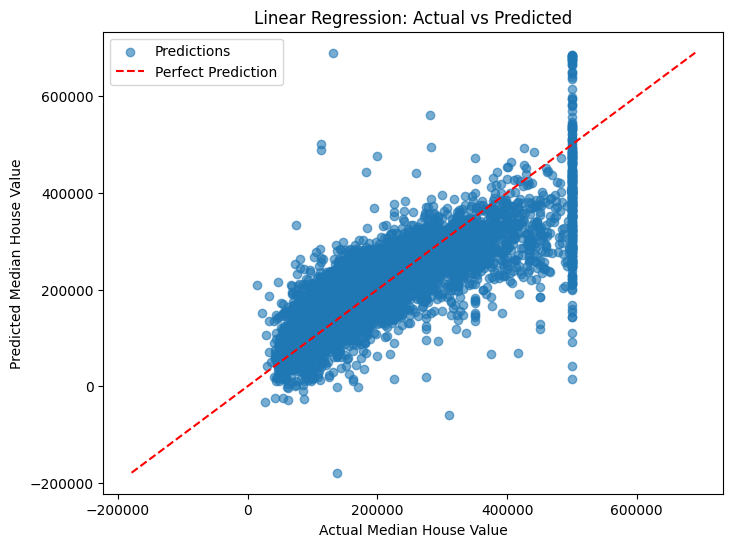

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predictions")

max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Perfect Prediction")

plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()


2.Performed Logistic Regression on Bank Dataset

In [ ]:
df2=pd.read_csv("/content/bank.csv")
df2.shape

(11162, 17)

In [ ]:
[col for col in df2.columns if df2[col].isnull().sum() > 0]

[]

In [ ]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
df2['deposit'] = df2['deposit'].map({'yes': 1, 'no': 0})


In [ ]:
X = df2.drop('deposit', axis=1)
y = df2['deposit']

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8083296014330497

Confusion Matrix:
 [[972 194]
 [234 833]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1166
           1       0.81      0.78      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



In [ ]:
y_prob = model.predict_proba(X_test)[:,1]

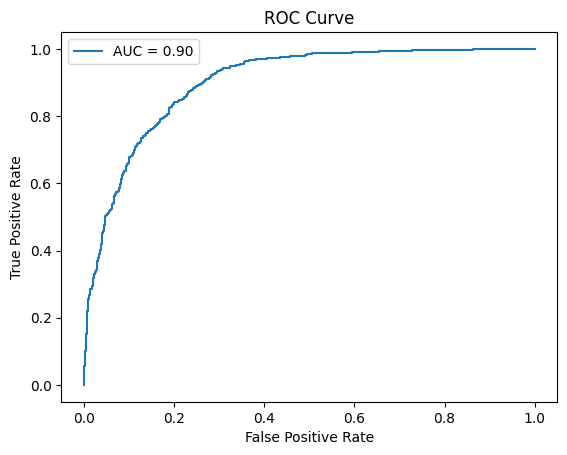

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='AUC = %.2f' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()